## 4.5 RNN

### RNN
* Recurrent Neural Network, 순환 신경망
* 과거의 행위가 다음 판단에 영향을 미치는 경우
* 고정 데이터가 아닌 순서가 있는 데이터
    * 예) 우와! 참 재밌네 vs 망할 참 재밌네!
* 구글 번역 서비스
    * Seq2Seq 신경망 모델
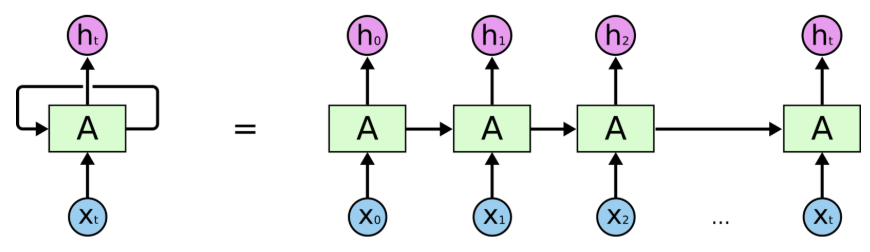

### 순환 신경망
* 시퀀스 데이터 처리할 수 있는 방법
    * RNN
    * 1D Convnet
* 주요 사례
    * 문서 분류, 시계열 분류
    * 감성분석
* 특징
    * 이전 상태 유지
    ```python
    state = 0
    for input in inputs:
        outout, state = rnn_cell(input, state)
    ```
* RNN 개선
    * LSTM(Long Short Term Memory)
    * GRU

### Vanilla RNN
* 상태는 한개의 히든 벡터 H 로 구성
* $h_t = fw(h_{t-1}, x_t)$
    * $h_t = tanh(W_{hh}h_{t-1} + W_{xh}x_t$
    * $ y_t = W_{hy}h_t $
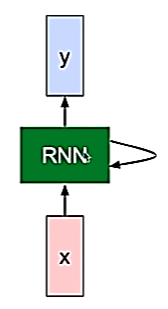

### LSTM
* Long Short-Term Memory Unit
* 1990년대 중반 RNN의 변형으로 등장
* 자연어 처리 분야 딥러닝 기법 중 가장 활발히 사용
* RNN의 맨 뒤에서 맨 앞의 정보를 기억하지 못하는 특성 보완
* 오차의 그라디언트가 시간을 거슬러 잘 흘러갈 수 있다.
* 1000단계가 넘는 Backpropagation 과정에서 오차 값 유지
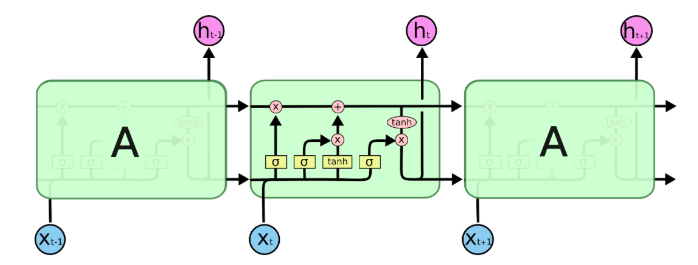

### GRUCell
* Gated Recurrent Units
* 2014 뉴욕대 조경현 교수 제안
* LSTM의 변형, 더 간단한 구조
* 게이트 된 순환 유닛(Gate Recurrent Unit)
* 잊기와 입력 게이트들을 하나의 단일 Update 게이트로 통합
* 셀 상태와 숨겨진 상태 통합
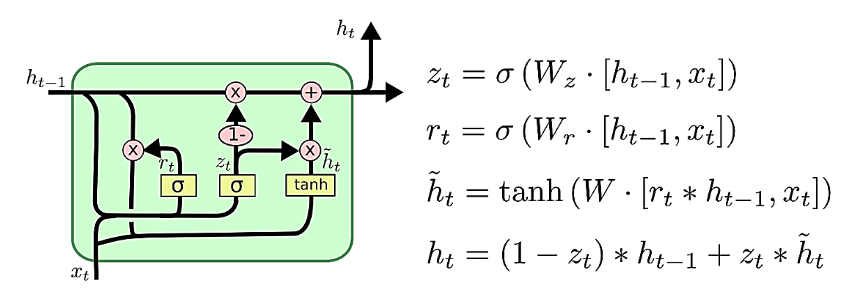

## 텍스트 데이터 다루기
* 텍스트가 가장 흔한 시퀀스 데이타
* 비전이 픽셀에 대한 패턴인식
* 자연어처리는 단어, 문장, 문단에 대한 패턴인식
* 입력데이타는 텍스트 원본일 수 없어서 텍스트 벡터화 필요
    * 텍스트를 단어로 나누고 각 단어를 하나의 벡터로 변환
    * 텍스트를 문자로 나누고 각 문자를 하나의 벡터로 변환
    * 텍스트에서 단어나 문자의 n-그램을 추출하여 그것을 하나의 벡터로 변환
        * n-gram: 문장에서 이웃한 N개의 문자
        * n-gram은 연속된 단어나 문자의 그룹으로 텍스트에서 단어나 문자를 하나씩 이동하면서 추출
            * "The cat sat on the mat"
                * 2-gram : "The", "The cat", "cat", "cat sat", "sat", "sat on", "on", "on the", "the", "the mat", "mat"
    * 어떻게 변환하든 이것을 토큰이라한다.
    * 토큰에 수치형 벡터 연결
        * 원핫 인코딩
        * 토큰 임베딩

### 단어와 문자의 원핫 인코딩
* 토큰을 벡터로 변환하는 가장 일반적인 방법
* 모든 단어에 고유한 인텍스 부여, 인텍스를 원핫 인코딩
    * 단어가 아니라 문자를 대상으로 해도 됨
* keras 원핫인코딩 유틸
    * keras.preprocessing.text.Tokenizer
    

### 단어 임베딩 사용하기
* 원핫 인코딩은 희소배열인데다가 단어나 문자수가 많아 지면 차원이 너무 높다.
    * 밀집, 저차원이 필요
        * 데이터로 학습
            * 예)남성/여성, 복수/단수, 부정/긍정
        * 사전 훈련 단어 임베딩 사용

#### 훈련된 단어 임베딩 사용하기
* Web3vec
* GloVe 

### RNN "hihello" 예제
* "hihello"문자열의 문자 입력으로 다음 문자 예측
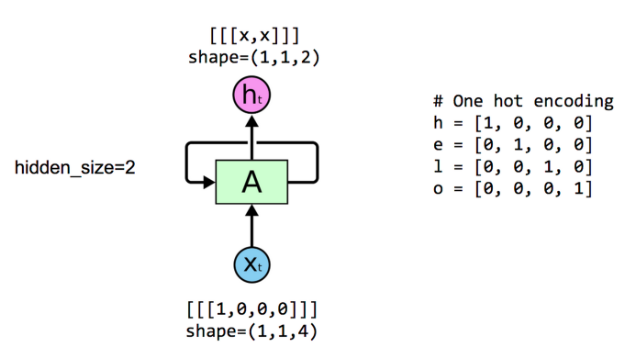

In [1]:
# Lab 12 RNN
import tensorflow as tf
import numpy as np
tf.set_random_seed(777)  # reproducibility

idx2char = ['h', 'i', 'e', 'l', 'o']
# Teach hello: hihell -> ihello
x_data = [[0, 1, 0, 2, 3, 3]]   # hihell
x_one_hot = [[[1, 0, 0, 0, 0],   # h 0
              [0, 1, 0, 0, 0],   # i 1
              [1, 0, 0, 0, 0],   # h 0
              [0, 0, 1, 0, 0],   # e 2
              [0, 0, 0, 1, 0],   # l 3
              [0, 0, 0, 1, 0]]]  # l 3

y_data = [[1, 0, 2, 3, 3, 4]]    # ihello

num_classes = 5
input_dim = 5  # one-hot size
hidden_size = 5  # output from the LSTM. 5 to directly predict one-hot
batch_size = 1   # one sentence
sequence_length = 6  # |ihello| == 6
learning_rate = 0.1

X = tf.placeholder(
    tf.float32, [None, sequence_length, input_dim])  # X one-hot
Y = tf.placeholder(tf.int32, [None, sequence_length])  # Y label

cell = tf.contrib.rnn.BasicLSTMCell(num_units=hidden_size, state_is_tuple=True)
initial_state = cell.zero_state(batch_size, tf.float32)
outputs, _states = tf.nn.dynamic_rnn(
    cell, X, initial_state=initial_state, dtype=tf.float32)

# FC layer
X_for_fc = tf.reshape(outputs, [-1, hidden_size])
# fc_w = tf.get_variable("fc_w", [hidden_size, num_classes])
# fc_b = tf.get_variable("fc_b", [num_classes])
# outputs = tf.matmul(X_for_fc, fc_w) + fc_b
outputs = tf.contrib.layers.fully_connected(
    inputs=X_for_fc, num_outputs=num_classes, activation_fn=None)

# reshape out for sequence_loss
outputs = tf.reshape(outputs, [batch_size, sequence_length, num_classes])

weights = tf.ones([batch_size, sequence_length])
sequence_loss = tf.contrib.seq2seq.sequence_loss(
    logits=outputs, targets=Y, weights=weights)
loss = tf.reduce_mean(sequence_loss)
train = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss)

prediction = tf.argmax(outputs, axis=2)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(50):
        l, _ = sess.run([loss, train], feed_dict={X: x_one_hot, Y: y_data})
        result = sess.run(prediction, feed_dict={X: x_one_hot})
        if i%5 == 0:
            print(i, "loss:", l, "prediction: ", result, "true Y: ", y_data)

        # print char using dic
        result_str = [idx2char[c] for c in np.squeeze(result)]
        print("\tPrediction str: ", ''.join(result_str))


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
This class is equivalent as tf.keras.layers.LSTMCell, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Instructions for updating:
Colocations handled automatically by placer.
0 loss: 1.6078763 prediction:  [[3 3 3 3 3 3]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  llllll
	Prediction str:  llllll
	Prediction str:  llllll
	Prediction str:  llllll
	Prediction str:  illlll
5 loss: 1.140437 prediction:  [[1 3 3 3 3 3]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  illlll
	Prediction str:  ilello
	Prediction str:  ilello
	Prediction str:  ihello
	Prediction str:  ihello
10 loss: 0.54275775 prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0

#### LSTM을 이용한 문장 자동 생성기 예제
* 박경리 토지 다운로드
    * 국립국어원 : https://ithub.korean.go.kr/user/total/database/corpusView.do?boardSeq=2&articleSeq=2081&boardGb=T&isInsUpd=&boardType=CORPUS
    * ./data/BEXX004.txt
* 필요 라이브러리
    * `!pip install beautifulsoup4`
    * `!pip install konlpy`

In [ ]:
!pip install beautifulsoup4
!pip install konlpy

In [2]:
import codecs
from bs4 import BeautifulSoup
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.layers import LSTM
from keras.optimizers import RMSprop
from keras.utils.data_utils import get_file
import numpy as np
import random, sys

fp = codecs.open("./data/BEXX0004.txt", "r", encoding="utf-16")
soup = BeautifulSoup(fp, "html.parser")
body = soup.select_one("body")
text = body.getText() + " "
print('코퍼스의 길이: ', len(text))
# 문자를 하나하나 읽어 들이고 ID 붙이기
chars = sorted(list(set(text)))
print('사용되고 있는 문자의 수:', len(chars))
char_indices = dict((c, i) for i, c in enumerate(chars)) # 문자 → ID
indices_char = dict((i, c) for i, c in enumerate(chars)) # ID → 문자
# 텍스트를 maxlen개의 문자로 자르고 다음에 오는 문자 등록하기
maxlen = 20
step = 3
sentences = []
next_chars = []
for i in range(0, len(text) - maxlen, step):
    sentences.append(text[i: i + maxlen])
    next_chars.append(text[i + maxlen])
print('학습할 구문의 수:', len(sentences))
print('텍스트를 ID 벡터로 변환합니다...')
X = np.zeros((len(sentences), maxlen, len(chars)), dtype=np.bool)
y = np.zeros((len(sentences), len(chars)), dtype=np.bool)
for i, sentence in enumerate(sentences):
    for t, char in enumerate(sentence):
        X[i, t, char_indices[char]] = 1
    y[i, char_indices[next_chars[i]]] = 1
# 모델 구축하기(LSTM)
print('모델을 구축합니다...')
model = Sequential()
model.add(LSTM(128, input_shape=(maxlen, len(chars))))
model.add(Dense(len(chars)))
model.add(Activation('softmax'))
optimizer = RMSprop(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer)
# 후보를 배열에서 꺼내기
def sample(preds, temperature=1.0):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)
    return np.argmax(probas)
# 학습시키고 텍스트 생성하기 반복
for iteration in range(1, 60):
    print()
    print('-' * 50)
    print('반복 =', iteration)
    model.fit(X, y, batch_size=128, nb_epoch=1) # 
    # 임의의 시작 텍스트 선택하기
    start_index = random.randint(0, len(text) - maxlen - 1)
    # 다양한 다양성의 문장 생성
    for diversity in [0.2, 0.5, 1.0, 1.2]:
        print()
        print('--- 다양성 = ', diversity)
        generated = ''
        sentence = text[start_index: start_index + maxlen]
        generated += sentence
        print('--- 시드 = "' + sentence + '"')
        sys.stdout.write(generated)
        # 시드를 기반으로 텍스트 자동 생성
        for i in range(400):
            x = np.zeros((1, maxlen, len(chars)))
            for t, char in enumerate(sentence):
                x[0, t, char_indices[char]] = 1.
            # 다음에 올 문자를 예측하기
            preds = model.predict(x, verbose=0)[0]
            next_index = sample(preds, diversity)
            next_char = indices_char[next_index]
            # 출력하기
            generated += next_char
            sentence = sentence[1:] + next_char
            sys.stdout.write(next_char)
            sys.stdout.flush()
        print()

Using TensorFlow backend.


코퍼스의 길이:  360490
사용되고 있는 문자의 수: 1888
학습할 구문의 수: 120157
텍스트를 ID 벡터로 변환합니다...
모델을 구축합니다...

--------------------------------------------------
반복 = 1
Instructions for updating:
Use tf.cast instead.


/Users/rainer/Dropbox/work/ml_dl/lib/python3.6/site-packages/ipykernel_launcher.py:58: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/1
120157/120157 [==============================] - 408s 3ms/step - loss: 3.7887

--- 다양성 =  0.2
--- 시드 = " 아배 놔두고 시집온 내가 직일년이지"
 아배 놔두고 시집온 내가 직일년이지 않았다. 그러나 그러나 다가 있었다. 그러나 그러나 하지 않았다. 그러나 다가 있는 것이 있는 것이 있는 것이 비음이 있었다. 그런 말이 있었다. 그러나 하고 있는 것이다. 그러나 대하고 있는 것이다. 그러나 그러나 다가 것이 있는 것이 생각이 있었다. 그러나 그러나 하고 있는 것이 그 말이 있었다. 그런 말이 있었다. 그러나 그러나 다가 한다.
"그런 말이 있다. 그러나 그러나 다가 하는 것이 있는 것이 나이 있었다. 그러나 내가 있다. 그러나 하고 있는 것이다. 그러나 다 말이 있는 것이다. 그러나 다 하다. 그러나  기다. 그러나 이 있는 것이 아니다.
"그런 말이 있다. 그러나 그러나 그러나 지마는 그런 것이 있었다. 그러나 그러나 다가 하지 않았다. 그러나 하고 있는 것이 있는 것이 ."
"그런 

--- 다양성 =  0.5
--- 시드 = " 아배 놔두고 시집온 내가 직일년이지"
 아배 놔두고 시집온 내가 직일년이지. 어매 가 있는 것이다. 자기 동생이 알아왔다.
"그렇다."
"그 말이 있는 것이다. 바람을 막어 있다.
"오."
"그라는 사람이 있는 것이 않았다. 조선을 적어서 게 있었다. 그런 지도 그렇지 않았다. 그렇다. 그런 것이 ……"
"그러나 자들 하고 있는 것이 하다. 그러나 고, 고 자신 신지 않았을 것이 만나 있었다. 그러나 이는 것이 없었다. 그런 일이 되었다.
"이 집 사람이 있었다. 그러나 들어서 생각이 주어 있다.
"그것이 내가 다 하지 않았다. 연해서 나가지 않았다. 웃는 것이 ."
"나기는 아니지요."
"그런 말이 있지."
"그런 말이요."
"그러나 비여 사람이 알아오지 않았다. 내 말이 있었다. 그러나 모르지 않았이 동생은 고개한 사람이 오나 있는

KeyboardInterrupt: 

#### 챗봇 실습 예제
* Eliza online demo : http://www.masswerk.at/elizabot/
    * 환자 중심 상담 이론 기반
    * 상대의 말을 반복하는 단순한 기능
    * 영어만 가능

##### 필요 라이브러리
* `!pip install beautifulsoup4`
* `!pip install konlpy`
    * 윈도즈: https://needjarvis.tistory.com/224
    * 맥 : 
        * `export MACOSX_DEPLOYMENT_TARGET=10.10`
        * `CFLAGS="-stdlib=libc++" pip install konlpy`


In [ ]:
!pip install beautifulsoup4

In [ ]:
# 맥인 경우만 실행
!CFLAGS="-stdlib=libc++" pip install jpype1
!export MACOSX_DEPLOYMENT_TARGET=10.10
!CFLAGS='-stdlib=libc++' pip install konlpy

#!pip install konlpy

In [9]:
import codecs
from bs4 import BeautifulSoup
import urllib.request
from konlpy.tag import Twitter
import os, re, json, random
dict_file = "chatbot-data.json"
dic = {}
twitter = Twitter()
# 딕셔너리에 단어 등록하기 --- (※1)
def register_dic(words):
    global dic
    if len(words) == 0: return
    tmp = ["@"]
    for i in words:
        word = i[0]
        if word == "" or word == "\r\n" or word == "\n": continue
        tmp.append(word)
        if len(tmp) < 3: continue
        if len(tmp) > 3: tmp = tmp[1:]
        set_word3(dic, tmp)
        if word == "." or word == "?":
            tmp = ["@"]
            continue
    # 딕셔너리가 변경될 때마다 저장하기
    json.dump(dic, open(dict_file,"w", encoding="utf-8"))
# 딕셔너리에 글 등록하기
def set_word3(dic, s3):
    w1, w2, w3 = s3
    if not w1 in dic: dic[w1] = {}
    if not w2 in dic[w1]: dic[w1][w2] = {}
    if not w3 in dic[w1][w2]: dic[w1][w2][w3] = 0
    dic[w1][w2][w3] += 1
# 문장 만들기 --- (※2)
def make_sentence(head):
    if not head in dic: return ""
    ret = []
    if head != "@": ret.append(head)        
    top = dic[head]
    w1 = word_choice(top)
    w2 = word_choice(top[w1])
    ret.append(w1)
    ret.append(w2)
    while True:
        if w1 in dic and w2 in dic[w1]:
            w3 = word_choice(dic[w1][w2])
        else:
            w3 = ""
        ret.append(w3)
        if w3 == "." or w3 == "？ " or w3 == "": break
        w1, w2 = w2, w3
    ret = "".join(ret)
    # 띄어쓰기
    params = urllib.parse.urlencode({
        "_callback": "",
        "q": ret
    })
    # 네이버 맞춤법 검사기를 사용합니다.
    try:
        data = urllib.request.urlopen("https://m.search.naver.com/p/csearch/dcontent/spellchecker.nhn?" + params)
        data = data.read().decode("utf-8")[1:-2]
        data = json.loads(data)
        data = data["message"]["result"]["html"]
        data = soup = BeautifulSoup(data, "html.parser").getText()
        # 리턴
    except :
        data = ret
    return data
def word_choice(sel):
    keys = sel.keys()
    return random.choice(list(keys))
# 챗봇 응답 만들기 --- (※3)
def make_reply(text):
    # 단어 학습시키기
    if not text[-1] in [".", "?"]: text += "."
    words = twitter.pos(text)
    register_dic(words)
    # 사전에 단어가 있다면 그것을 기반으로 문장 만들기
    for word in words:
        face = word[0]
        if face in dic: return make_sentence(face)
    return make_sentence("@")
# 딕셔너리가 있다면 읽어 들이기
if os.path.exists(dict_file):
    dic = json.load(open(dict_file,"r"))
    print("dictionary loaded.")
else:
    print("no dictionary. 챗봇 훈련이 필요해요.")

dictionary loaded.


In [10]:
print("대화를 종료하시려면 'exit'를 입력하세요.")
while True:
    txt = input("Me:")
    if txt == "exit":
        print("Bye~")
        break
    reply = make_reply(txt)
    print("Bot:%s"%reply)

대화를 종료하시려면 'exit'를 입력하세요.
Me:안녕?
Bot:노트북이좀시끄러워..
Me:응 그래
Bot:응그래.
Me:맞아
Bot:노트북이좀시끄러워..
Me:알아 나도
Bot:알아나도.
Me:배고파
Bot:무지좋아하지.
Me:뭘?
Bot:뭘좀먹지그래?
Me:뭘 먹을까?
Bot:뭘좀먹지그래?
Me:뭐 먹냐고.
Bot:뭐좋아하니?
Me:치킨
Bot:치킨좋아해.
Me:치킨이랑 같이 먹으면 좋은게 있는데...
Bot:치킨이랑같이먹으면좋은게있는데...
Me:뭔지 아니?
Bot:뭔지아니?
Me:맥주!!
Bot:맥주도마시구.
Me:exit
Bye~
